In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create grid
w1 = np.linspace(-3, 3, 100)
w2 = np.linspace(-3, 3, 100)
W1, W2 = np.meshgrid(w1, w2)
loss = W1**2 + 2 * W2**2

In [46]:
# Distinct weights
W0 = np.array([-2, 2])
WT = np.array([-0.5, 0.5])
W_min = np.array([0, 0])

In [47]:
# Simulated curved trajectory (non-linear interpolation)
steps = 10
weights = []
for t in np.linspace(0, 1, steps):
    # Create a curve rather than a straight line: e.g., use a sine bump
    curved = (1 - t) * W0 + t * WT + np.array([0, 0.5 * np.sin(np.pi * t)])
    weights.append(curved)
weights = np.array(weights)

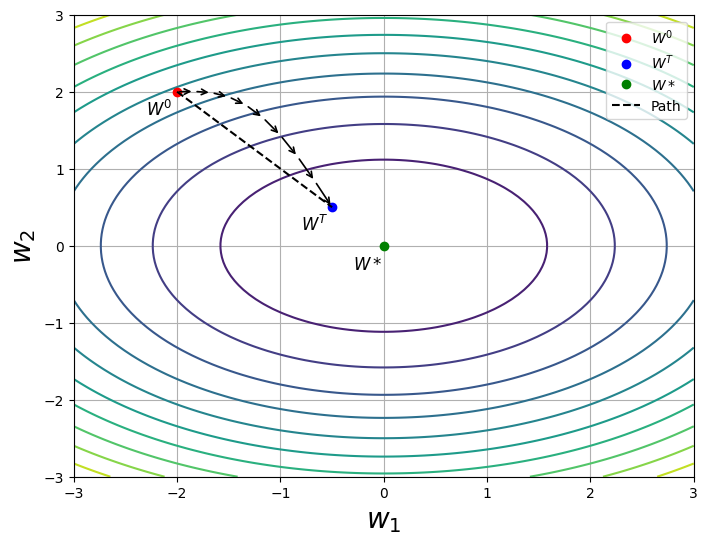

In [55]:
# Plot loss contours
plt.figure(figsize=(8, 6))
plt.contour(W1, W2, loss, levels=10, cmap='viridis')

# Plot W^0
plt.plot(*W0, 'ro', label='$W^0$')
plt.text(*W0 -0.3,'$W^0$',size=12)

# Plot W^T
plt.plot(*WT, 'bo', label='$W^T$')
plt.text(*WT -0.3,'$W^T$',size=12)

# Plot W_min
plt.plot(*W_min, 'go', label='$W*$')
plt.text(*W_min -0.3,'$W*$',size=12)

# Plot trajectory with arrows
for i in range(len(weights) - 1):
    start, end = weights[i], weights[i + 1]
    plt.annotate("",
                 xy=end, xytext=start,
                 arrowprops=dict(arrowstyle="->", color="black", lw=1.2))

# Dotted line between W^0 and W^T
plt.plot([W0[0], WT[0]], [W0[1], WT[1]], 'k--', label='Path')

# Labels and grid
plt.xlabel('$w_1$', size=20)
plt.ylabel('$w_2$', size=20)
# plt.title('Loss Surface with Optimization Path')
# plt.xticks([])
# plt.yticks([])
plt.legend()
plt.grid(True)
plt.show()